In [67]:
import os
import keras
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras import layers
from keras import callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [68]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [69]:
# Specify GPU usage
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [70]:
# Normalize image color values
datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    rotation_range = 20,       # Rotate images up to 20 degrees
    width_shift_range = 0.2,   # Shift width by 20%
    height_shift_range = 0.2,  # Shift height by 20%
    shear_range = 0.2,         # Shear distortion
    zoom_range = 0.2,          # Zoom into images
    horizontal_flip = True,    # Flip images horizontally
    fill_mode = "nearest"      # Fill missing pixels with nearest values
)

# Specify path, target shape, batch size, classifier output, color mode, and shuffle
train_generator = datagen.flow_from_directory(
    '../data/train',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(
    '../data/test',
    target_size = (32, 32),
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = False
)

Found 20001 images belonging to 2 classes.
Found 4999 images belonging to 2 classes.


In [71]:
########### CODE PROVIDED BY PROFESSOR ###########
model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),  # Explicit Input Layer
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation="sigmoid")  # Binary classification output
])

In [72]:
########### CODE PROVIDED BY PROFESSOR ###########
model.compile(
	optimizer="adam",
    loss="binary_crossentropy",
	metrics=["accuracy"]
)

In [73]:
# Setup callbacks
early_stopping = callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = True)
model_checkpoint = callbacks.ModelCheckpoint('best_model.h5', monitor = 'val_loss', save_best_only = True)

In [74]:
history = model.fit(
    train_generator,
    epochs = 30,
    callbacks = [early_stopping , model_checkpoint],
    validation_data = test_generator,
    verbose = 2
)

Epoch 1/30


/Users/langtowl/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


626/626 - 22s - 35ms/step - accuracy: 0.5474 - loss: 0.6844 - val_accuracy: 0.6077 - val_loss: 0.6368
Epoch 2/30


626/626 - 20s - 32ms/step - accuracy: 0.5963 - loss: 0.6614 - val_accuracy: 0.6659 - val_loss: 0.5891
Epoch 3/30
626/626 - 20s - 33ms/step - accuracy: 0.5993 - loss: 0.6902 - val_accuracy: 0.5041 - val_loss: 0.7000
Epoch 4/30
626/626 - 20s - 32ms/step - accuracy: 0.5785 - loss: 0.6782 - val_accuracy: 0.6771 - val_loss: 0.5926
Epoch 5/30


626/626 - 20s - 32ms/step - accuracy: 0.6577 - loss: 0.6220 - val_accuracy: 0.7127 - val_loss: 0.5460
Epoch 6/30
626/626 - 20s - 31ms/step - accuracy: 0.6760 - loss: 0.6043 - val_accuracy: 0.5841 - val_loss: 0.6694
Epoch 7/30
626/626 - 19s - 31ms/step - accuracy: 0.6879 - loss: 0.5940 - val_accuracy: 0.6883 - val_loss: 0.5835
Epoch 8/30


626/626 - 19s - 31ms/step - accuracy: 0.6836 - loss: 0.6031 - val_accuracy: 0.7327 - val_loss: 0.5235
Epoch 9/30


626/626 - 20s - 32ms/step - accuracy: 0.6974 - loss: 0.5903 - val_accuracy: 0.7403 - val_loss: 0.5216
Epoch 10/30
626/626 - 20s - 31ms/step - accuracy: 0.7019 - loss: 0.5804 - val_accuracy: 0.6895 - val_loss: 0.5816
Epoch 11/30


626/626 - 20s - 31ms/step - accuracy: 0.7078 - loss: 0.5802 - val_accuracy: 0.7413 - val_loss: 0.5105
Epoch 12/30


626/626 - 20s - 32ms/step - accuracy: 0.7119 - loss: 0.5689 - val_accuracy: 0.7520 - val_loss: 0.5019
Epoch 13/30


626/626 - 20s - 32ms/step - accuracy: 0.7146 - loss: 0.5730 - val_accuracy: 0.7736 - val_loss: 0.4765
Epoch 14/30
626/626 - 20s - 33ms/step - accuracy: 0.7248 - loss: 0.5579 - val_accuracy: 0.7758 - val_loss: 0.4816
Epoch 15/30
626/626 - 20s - 33ms/step - accuracy: 0.7240 - loss: 0.5554 - val_accuracy: 0.7377 - val_loss: 0.5206
Epoch 16/30
626/626 - 21s - 33ms/step - accuracy: 0.7258 - loss: 0.5568 - val_accuracy: 0.7465 - val_loss: 0.5052
Epoch 17/30
626/626 - 21s - 33ms/step - accuracy: 0.7238 - loss: 0.5509 - val_accuracy: 0.6057 - val_loss: 0.7767
Epoch 18/30


626/626 - 20s - 32ms/step - accuracy: 0.7332 - loss: 0.5426 - val_accuracy: 0.7866 - val_loss: 0.4539
Epoch 19/30
626/626 - 20s - 32ms/step - accuracy: 0.7394 - loss: 0.5286 - val_accuracy: 0.7666 - val_loss: 0.4775
Epoch 20/30
626/626 - 20s - 31ms/step - accuracy: 0.7495 - loss: 0.5139 - val_accuracy: 0.7830 - val_loss: 0.4609
Epoch 21/30
626/626 - 20s - 32ms/step - accuracy: 0.7428 - loss: 0.5228 - val_accuracy: 0.7618 - val_loss: 0.5194
Epoch 22/30
626/626 - 19s - 30ms/step - accuracy: 0.7532 - loss: 0.5118 - val_accuracy: 0.7391 - val_loss: 0.5530
Epoch 23/30
626/626 - 20s - 32ms/step - accuracy: 0.7457 - loss: 0.5246 - val_accuracy: 0.7445 - val_loss: 0.5298


In [75]:
########### CODE PROVIDED BY PROVESSOR ###########
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,426,245 (13.07 MB)

 Trainable params: 1,142,081 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,284,164 (8.71 MB)

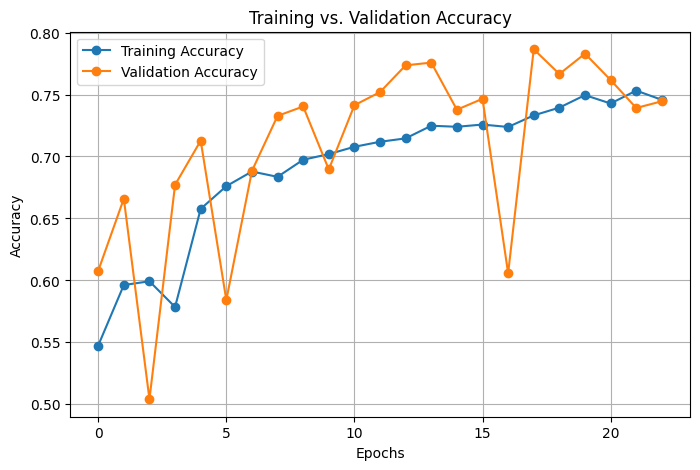

In [76]:
# Plot training vs validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

In [77]:
# Get true labels
true_labels = test_generator.classes

In [78]:
# Get predictions
pred_probs = model.predict(test_generator)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [79]:
# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

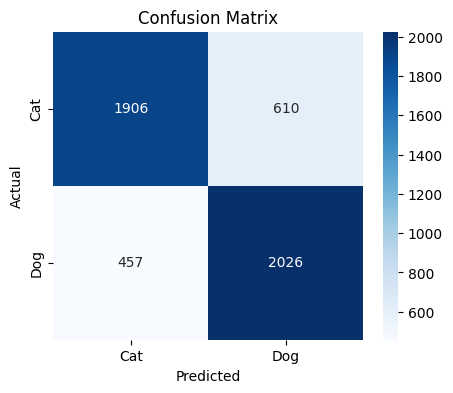

              precision    recall  f1-score   support

         Cat       0.81      0.76      0.78      2516
         Dog       0.77      0.82      0.79      2483

    accuracy                           0.79      4999
   macro avg       0.79      0.79      0.79      4999
weighted avg       0.79      0.79      0.79      4999



In [80]:
# Display confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(true_labels, pred_labels, target_names=["Cat", "Dog"]))
